In [1]:
import re

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('3.csv')

In [3]:
class Model:
    def __init__(self, name, error_squared, errors):
        match = re.match(r'tf-model-16-(?P<l1>\d+)-(?P<l2>\d+)-(?P<l3>\d+)-4', name)
        self.cfg = list(map(lambda n: int(match.group(f'l{n}')), range(1, 4)))
        self.error_squared = error_squared
        self.errors = errors

In [4]:
ls = []
for index, row in df.iterrows():
    ls.append(Model(
        row['Model'],
        [row['error squared 1'], row['error squared 2'], row['error squared 3'], row['error squared 4']],
        [row['check error 1'], row['check error 1.1'], row['check error 1.2'], row['check error 1.3']]
    ))
ls.sort(key=lambda m: sum(m.errors))

In [5]:
x = list(map(lambda m: str(m.cfg), ls))
y = list(map(lambda m: sum(m.errors), ls))

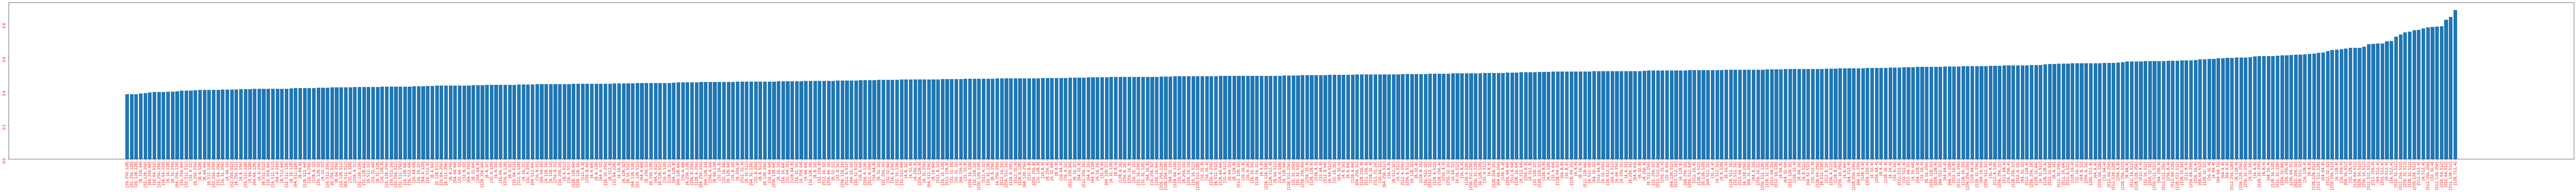

In [6]:
plt.figure(figsize=(128, 8))
plt.tick_params(colors='red', which='both', labelrotation=90)
plt.bar(x, y)
plt.savefig('sum.png', dpi=256)